# Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import pickle
from IPython.display import Image, display, HTML
import math
import matplotlib.pyplot as plt

# Import Data

In [10]:
with open('../scrimmage4_link_dataset.pickle', 'rb') as file:
    link_dataset_4 = pickle.load(file)

In [11]:
with open('../scrimmage5_link_dataset.pickle', 'rb') as file:
    link_dataset_5 = pickle.load(file)

In [2]:
with open('mlp_scr4_res.pickle', 'rb') as file:
    mlp_scr4_res = pickle.load(file)

In [30]:
with open('mlp_scr5_res.pickle', 'rb') as file:
    mlp_scr5_res = pickle.load(file)

In [4]:
with open('gru_scr4_res.pickle', 'rb') as file:
    gru_scr4_res = pickle.load(file)

In [5]:
with open('gru_scr5_res.pickle', 'rb') as file:
    gru_scr5_res = pickle.load(file)

In [6]:
with open('bsru_scr4_res.pickle', 'rb') as file:
    bsru_scr4_res = pickle.load(file)

In [7]:
with open('bsru_scr5_res.pickle', 'rb') as file:
    bsru_scr5_res = pickle.load(file)

In [8]:
with open('bgru_scr4_res.pickle', 'rb') as file:
    bgru_scr4_res = pickle.load(file)

In [9]:
with open('bgru_scr5_res.pickle', 'rb') as file:
    bgru_scr5_res = pickle.load(file)

# Calculate Accuracies, and Perform Ensemble Classification

In [36]:
accr0 = np.zeros((2,5))
accr1 = np.zeros((2,5))
accr2 = np.zeros((2,5))
accr3 = np.zeros((2,5))

In [37]:
# Scr4

predict_mlp = mlp_scr4_res['mlp_scr4_prd']
predict_gru = gru_scr4_res['gru_scr4_prd_2']
predict_bgru = bgru_scr4_res['bgru_scr4_prd_2']
predict_bsru = bsru_scr4_res['bsru_scr4_prd_2']
predict_sum = predict_bgru + predict_bsru + predict_gru
predict_ens = np.array([i>=2 for i in predict_sum])

target = bsru_scr4_res['bsru_scr4_trg_2']

tp_mlp = predict_mlp[target==1].sum()
tn_mlp = (target==0).sum() - predict_mlp[target==0].sum()
fp_mlp = predict_mlp[target==0].sum()
fn_mlp = (target==1).sum() - predict_mlp[target==1].sum()

tp_gru = predict_gru[target==1].sum()
tn_gru = (target==0).sum() - predict_gru[target==0].sum()
fp_gru = predict_gru[target==0].sum()
fn_gru = (target==1).sum() - predict_gru[target==1].sum()

tp_bsru = predict_bsru[target==1].sum()
tn_bsru = (target==0).sum() - predict_bsru[target==0].sum()
fp_bsru = predict_bsru[target==0].sum()
fn_bsru = (target==1).sum() - predict_bsru[target==1].sum()

tp_bgru = predict_bgru[target==1].sum()
tn_bgru = (target==0).sum() - predict_bgru[target==0].sum()
fp_bgru = predict_bgru[target==0].sum()
fn_bgru = (target==1).sum() - predict_bgru[target==1].sum()

tp_ens = predict_ens[target==1].sum()
tn_ens = (target==0).sum() - predict_ens[target==0].sum()
fp_ens = predict_ens[target==0].sum()
fn_ens = (target==1).sum() - predict_ens[target==1].sum()


accr0[0,0]= (tp_mlp+tn_mlp)/(tp_mlp+tn_mlp+fp_mlp+fn_mlp)
accr0[1,0]= 0.5*(tp_mlp/(tp_mlp+fp_mlp)+tn_mlp/(tn_mlp+fn_mlp))

accr0[0,1]= (tp_gru+tn_gru)/(tp_gru+tn_gru+fp_gru+fn_gru)
accr0[1,1]= 0.5*(tp_gru/(tp_gru+fp_gru)+tn_gru/(tn_gru+fn_gru))

accr0[0,2]= (tp_bsru+tn_bsru)/(tp_bsru+tn_bsru+fp_bsru+fn_bsru)
accr0[1,2]= 0.5*(tp_bsru/(tp_bsru+fp_bsru)+tn_bsru/(tn_bsru+fn_bsru))

accr0[0,3]= (tp_bgru+tn_bgru)/(tp_bgru+tn_bgru+fp_bgru+fn_bgru)
accr0[1,3]= 0.5*(tp_bgru/(tp_bgru+fp_bgru)+tn_bgru/(tn_bgru+fn_bgru))

accr0[0,4]= (tp_ens+tn_ens)/(tp_ens+tn_ens+fp_ens+fn_ens)
accr0[1,4]= 0.5*(tp_ens/(tp_ens+fp_ens)+tn_ens/(tn_ens+fn_ens))

In [38]:
# Scr4 Pilot

predict_mlp = mlp_scr4_res['mlp_scr4_plt_prd']
predict_gru = gru_scr4_res['gru_scr4_plt_prd_2']
predict_bgru = bgru_scr4_res['bgru_scr4_plt_prd_2']
predict_bsru = bsru_scr4_res['bsru_scr4_plt_prd_2']
predict_sum = predict_bgru + predict_bsru + predict_gru
predict_ens = np.array([i>=2 for i in predict_sum])

target = bsru_scr4_res['bsru_scr4_plt_trg_2']

tp_mlp = predict_mlp[target==1].sum()
tn_mlp = (target==0).sum() - predict_mlp[target==0].sum()
fp_mlp = predict_mlp[target==0].sum()
fn_mlp = (target==1).sum() - predict_mlp[target==1].sum()

tp_gru = predict_gru[target==1].sum()
tn_gru = (target==0).sum() - predict_gru[target==0].sum()
fp_gru = predict_gru[target==0].sum()
fn_gru = (target==1).sum() - predict_gru[target==1].sum()

tp_bsru = predict_bsru[target==1].sum()
tn_bsru = (target==0).sum() - predict_bsru[target==0].sum()
fp_bsru = predict_bsru[target==0].sum()
fn_bsru = (target==1).sum() - predict_bsru[target==1].sum()

tp_bgru = predict_bgru[target==1].sum()
tn_bgru = (target==0).sum() - predict_bgru[target==0].sum()
fp_bgru = predict_bgru[target==0].sum()
fn_bgru = (target==1).sum() - predict_bgru[target==1].sum()

tp_ens = predict_ens[target==1].sum()
tn_ens = (target==0).sum() - predict_ens[target==0].sum()
fp_ens = predict_ens[target==0].sum()
fn_ens = (target==1).sum() - predict_ens[target==1].sum()


accr1[0,0]= (tp_mlp+tn_mlp)/(tp_mlp+tn_mlp+fp_mlp+fn_mlp)
accr1[1,0]= 0.5*(tp_mlp/(tp_mlp+fp_mlp)+tn_mlp/(tn_mlp+fn_mlp))

accr1[0,1]= (tp_gru+tn_gru)/(tp_gru+tn_gru+fp_gru+fn_gru)
accr1[1,1]= 0.5*(tp_gru/(tp_gru+fp_gru)+tn_gru/(tn_gru+fn_gru))

accr1[0,2]= (tp_bsru+tn_bsru)/(tp_bsru+tn_bsru+fp_bsru+fn_bsru)
accr1[1,2]= 0.5*(tp_bsru/(tp_bsru+fp_bsru)+tn_bsru/(tn_bsru+fn_bsru))

accr1[0,3]= (tp_bgru+tn_bgru)/(tp_bgru+tn_bgru+fp_bgru+fn_bgru)
accr1[1,3]= 0.5*(tp_bgru/(tp_bgru+fp_bgru)+tn_bgru/(tn_bgru+fn_bgru))

accr1[0,4]= (tp_ens+tn_ens)/(tp_ens+tn_ens+fp_ens+fn_ens)
accr1[1,4]= 0.5*(tp_ens/(tp_ens+fp_ens)+tn_ens/(tn_ens+fn_ens))


In [39]:
# Scr5

predict_mlp = mlp_scr5_res['mlp_scr5_prd']
predict_gru = gru_scr5_res['gru_scr5_prd']
predict_bgru = bgru_scr5_res['bgru_scr5_prd']
predict_bsru = bsru_scr5_res['bsru_scr5_prd']
predict_sum = predict_bgru + predict_bsru + predict_gru
predict_ens = np.array([i>=2 for i in predict_sum])

target = bsru_scr5_res['bsru_scr5_trg']

tp_mlp = predict_mlp[target==1].sum()
tn_mlp = (target==0).sum() - predict_mlp[target==0].sum()
fp_mlp = predict_mlp[target==0].sum()
fn_mlp = (target==1).sum() - predict_mlp[target==1].sum()

tp_gru = predict_gru[target==1].sum()
tn_gru = (target==0).sum() - predict_gru[target==0].sum()
fp_gru = predict_gru[target==0].sum()
fn_gru = (target==1).sum() - predict_gru[target==1].sum()

tp_bsru = predict_bsru[target==1].sum()
tn_bsru = (target==0).sum() - predict_bsru[target==0].sum()
fp_bsru = predict_bsru[target==0].sum()
fn_bsru = (target==1).sum() - predict_bsru[target==1].sum()

tp_bgru = predict_bgru[target==1].sum()
tn_bgru = (target==0).sum() - predict_bgru[target==0].sum()
fp_bgru = predict_bgru[target==0].sum()
fn_bgru = (target==1).sum() - predict_bgru[target==1].sum()

tp_ens = predict_ens[target==1].sum()
tn_ens = (target==0).sum() - predict_ens[target==0].sum()
fp_ens = predict_ens[target==0].sum()
fn_ens = (target==1).sum() - predict_ens[target==1].sum()


accr2[0,0]= (tp_mlp+tn_mlp)/(tp_mlp+tn_mlp+fp_mlp+fn_mlp)
accr2[1,0]= 0.5*(tp_mlp/(tp_mlp+fp_mlp)+tn_mlp/(tn_mlp+fn_mlp))

accr2[0,1]= (tp_gru+tn_gru)/(tp_gru+tn_gru+fp_gru+fn_gru)
accr2[1,1]= 0.5*(tp_gru/(tp_gru+fp_gru)+tn_gru/(tn_gru+fn_gru))

accr2[0,2]= (tp_bsru+tn_bsru)/(tp_bsru+tn_bsru+fp_bsru+fn_bsru)
accr2[1,2]= 0.5*(tp_bsru/(tp_bsru+fp_bsru)+tn_bsru/(tn_bsru+fn_bsru))

accr2[0,3]= (tp_bgru+tn_bgru)/(tp_bgru+tn_bgru+fp_bgru+fn_bgru)
accr2[1,3]= 0.5*(tp_bgru/(tp_bgru+fp_bgru)+tn_bgru/(tn_bgru+fn_bgru))

accr2[0,4]= (tp_ens+tn_ens)/(tp_ens+tn_ens+fp_ens+fn_ens)
accr2[1,4]= 0.5*(tp_ens/(tp_ens+fp_ens)+tn_ens/(tn_ens+fn_ens))

In [40]:
# Scr5 Pilot

predict_mlp = mlp_scr5_res['mlp_scr5_plt_prd']
predict_gru = gru_scr5_res['gru_scr5_plt_prd']
predict_bgru = bgru_scr5_res['bgru_scr5_plt_prd']
predict_bsru = bsru_scr5_res['bsru_scr5_plt_prd']
predict_sum = predict_bgru + predict_bsru + predict_gru
predict_ens = np.array([i>=2 for i in predict_sum])

target = bsru_scr5_res['bsru_scr5_plt_trg']

tp_mlp = predict_mlp[target==1].sum()
tn_mlp = (target==0).sum() - predict_mlp[target==0].sum()
fp_mlp = predict_mlp[target==0].sum()
fn_mlp = (target==1).sum() - predict_mlp[target==1].sum()

tp_gru = predict_gru[target==1].sum()
tn_gru = (target==0).sum() - predict_gru[target==0].sum()
fp_gru = predict_gru[target==0].sum()
fn_gru = (target==1).sum() - predict_gru[target==1].sum()

tp_bsru = predict_bsru[target==1].sum()
tn_bsru = (target==0).sum() - predict_bsru[target==0].sum()
fp_bsru = predict_bsru[target==0].sum()
fn_bsru = (target==1).sum() - predict_bsru[target==1].sum()

tp_bgru = predict_bgru[target==1].sum()
tn_bgru = (target==0).sum() - predict_bgru[target==0].sum()
fp_bgru = predict_bgru[target==0].sum()
fn_bgru = (target==1).sum() - predict_bgru[target==1].sum()

tp_ens = predict_ens[target==1].sum()
tn_ens = (target==0).sum() - predict_ens[target==0].sum()
fp_ens = predict_ens[target==0].sum()
fn_ens = (target==1).sum() - predict_ens[target==1].sum()


accr3[0,0]= (tp_mlp+tn_mlp)/(tp_mlp+tn_mlp+fp_mlp+fn_mlp)
accr3[1,0]= 0.5*(tp_mlp/(tp_mlp+fp_mlp)+tn_mlp/(tn_mlp+fn_mlp))

accr3[0,1]= (tp_gru+tn_gru)/(tp_gru+tn_gru+fp_gru+fn_gru)
accr3[1,1]= 0.5*(tp_gru/(tp_gru+fp_gru)+tn_gru/(tn_gru+fn_gru))

accr3[0,2]= (tp_bsru+tn_bsru)/(tp_bsru+tn_bsru+fp_bsru+fn_bsru)
accr3[1,2]= 0.5*(tp_bsru/(tp_bsru+fp_bsru)+tn_bsru/(tn_bsru+fn_bsru))

accr3[0,3]= (tp_bgru+tn_bgru)/(tp_bgru+tn_bgru+fp_bgru+fn_bgru)
accr3[1,3]= 0.5*(tp_bgru/(tp_bgru+fp_bgru)+tn_bgru/(tn_bgru+fn_bgru))

accr3[0,4]= (tp_ens+tn_ens)/(tp_ens+tn_ens+fp_ens+fn_ens)
accr3[1,4]= 0.5*(tp_ens/(tp_ens+fp_ens)+tn_ens/(tn_ens+fn_ens))

In [41]:
NNets = ['MLP','GRU','BSRU','BGRU','Ensemble']
scr4_accr = 100*accr0[0,:]
scr5_accr = 100*accr1[0,:]
scr4_plt_accr = 100*accr2[0,:]
scr5_plt_accr = 100*accr3[0,:]
scr4_wt_accr = 100*accr0[1,:]
scr5_wt_accr = 100*accr1[1,:]
scr4_wt_plt_accr = 100*accr2[1,:]
scr5_wt_plt_accr = 100*accr3[1,:]

data = {'Neural Network': NNets,
        'Scrimmage 4': scr4_accr,
        'Scrimmage 5': scr5_accr,
        'Scrimmage 4 (with pilot)': scr4_plt_accr,
        'Scrimmage 5 (with pilot)': scr5_plt_accr
       }
res = pd.DataFrame(data, columns = ['Neural Network', 'Scrimmage 4', 'Scrimmage 5',
        'Scrimmage 4 (with pilot)', 'Scrimmage 5 (with pilot)' ])

dataw = {'Neural Network': NNets,
        'Scrimmage 4': scr4_wt_accr,
        'Scrimmage 5': scr5_wt_accr,
        'Scrimmage 4 (with pilot)': scr4_wt_plt_accr,
        'Scrimmage 5 (with pilot)': scr5_wt_plt_accr
        }
wres = pd.DataFrame(dataw, columns = ['Neural Network', 'Scrimmage 4', 'Scrimmage 5',
        'Scrimmage 4 (with pilot)', 'Scrimmage 5 (with pilot)' ])




In [42]:
display(HTML(res.to_html(index=False)))

Neural Network,Scrimmage 4,Scrimmage 5,Scrimmage 4 (with pilot),Scrimmage 5 (with pilot)
MLP,72.882981,68.549972,75.051617,71.622762
GRU,74.690739,72.946576,76.559094,73.223946
BSRU,82.484276,80.933761,79.647461,79.291988
BGRU,82.896476,81.366792,80.212212,78.890047
Ensemble,82.922107,80.957004,80.051905,78.722093


In [43]:
display(HTML(wres.to_html(index=False)))

Neural Network,Scrimmage 4,Scrimmage 5,Scrimmage 4 (with pilot),Scrimmage 5 (with pilot)
MLP,70.167465,73.446425,71.242120,72.276223
GRU,73.443893,76.182371,74.599312,76.783277
BSRU,81.828314,83.343759,80.229609,80.425193
BGRU,83.002918,83.620542,83.933538,80.457228
Ensemble,83.214914,83.828568,82.787079,81.102644


In [47]:
display(HTML(res.to_html(index=False)))

Neural Network,Scrimmage 4,Scrimmage 5,Scrimmage 4 (with pilot),Scrimmage 5 (with pilot)
CNN,0.728980,0.675078,0.753445,0.715603
GRU,0.746907,0.730706,0.765591,0.732239
BSRU,0.824843,0.811178,0.796475,0.792920
CBSDNN,0.828960,0.794034,0.789743,0.788335
BGRU,0.828965,0.813668,0.802122,0.788900
Ensemble,0.828970,0.794826,0.794913,0.786314


In [48]:
display(HTML(wres.to_html(index=False)))

Neural Network,Scrimmage 4,Scrimmage 5,Scrimmage 4 (with pilot),Scrimmage 5 (with pilot)
CNN,0.702610,0.732705,0.718168,0.723291
GRU,0.734439,0.761941,0.745993,0.767833
BSRU,0.818283,0.834889,0.802296,0.804252
CBSDNN,0.830099,0.837185,0.842104,0.816206
BGRU,0.830029,0.836205,0.839335,0.804572
Ensemble,0.833527,0.837964,0.839616,0.814830


# Accuracy Plots

In [4]:
rows = [5, 0, 1, 2, 3, 4, 5]
plotres = res.reindex(rows)

plotres.iloc[0, plotres.columns.get_loc('Neural Network')] = ''
plotres.iloc[6, plotres.columns.get_loc('Neural Network')] = ''

In [5]:
rows = [5, 0, 1, 2, 3, 4, 5]
plotwres = wres.reindex(rows)

plotwres.iloc[0, plotwres.columns.get_loc('Neural Network')] = ''
plotwres.iloc[6, plotwres.columns.get_loc('Neural Network')] = ''

In [6]:
ylmin = math.floor(min(min(res.min()[1:4]),min(wres.min()[1:4]))) - 1
ylmax = math.ceil(max(max(res.max()[1:4]),max(wres.max()[1:4]))) + 1

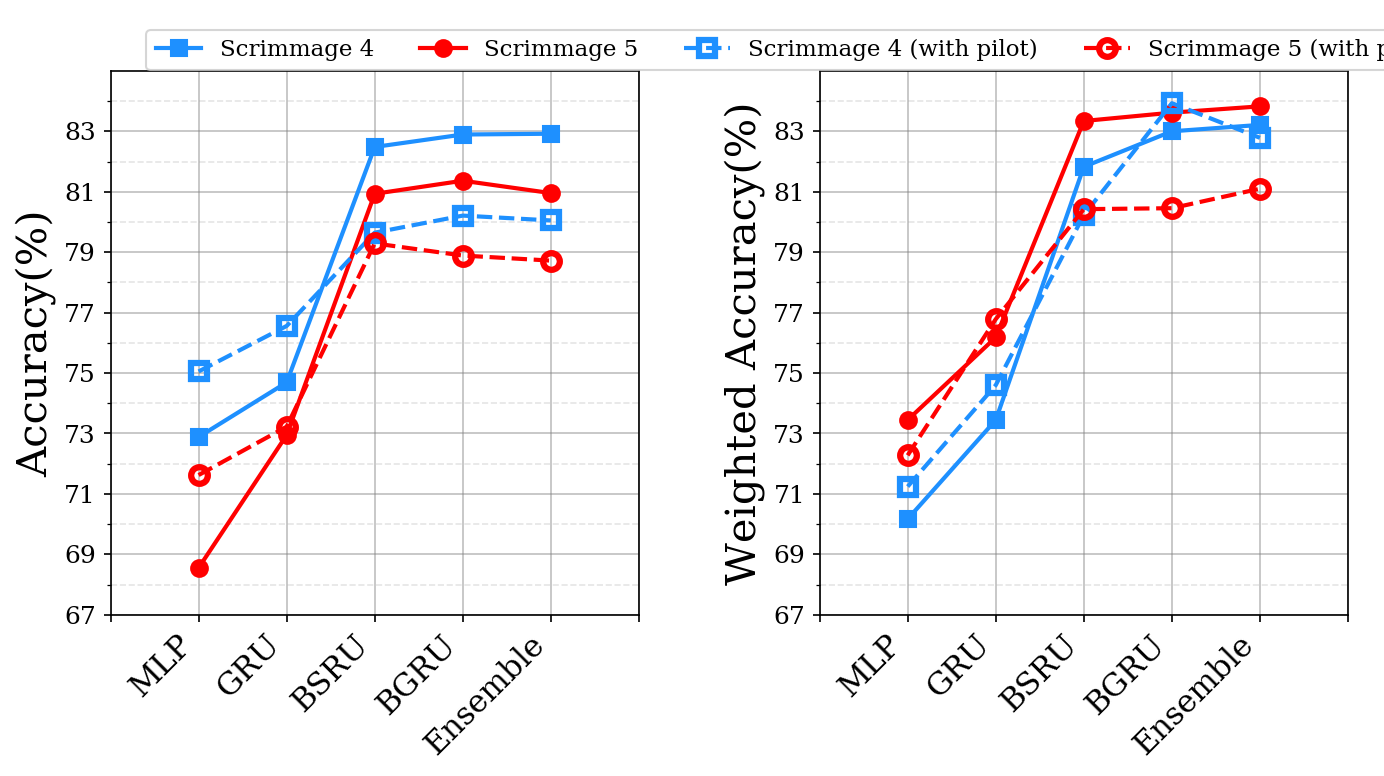

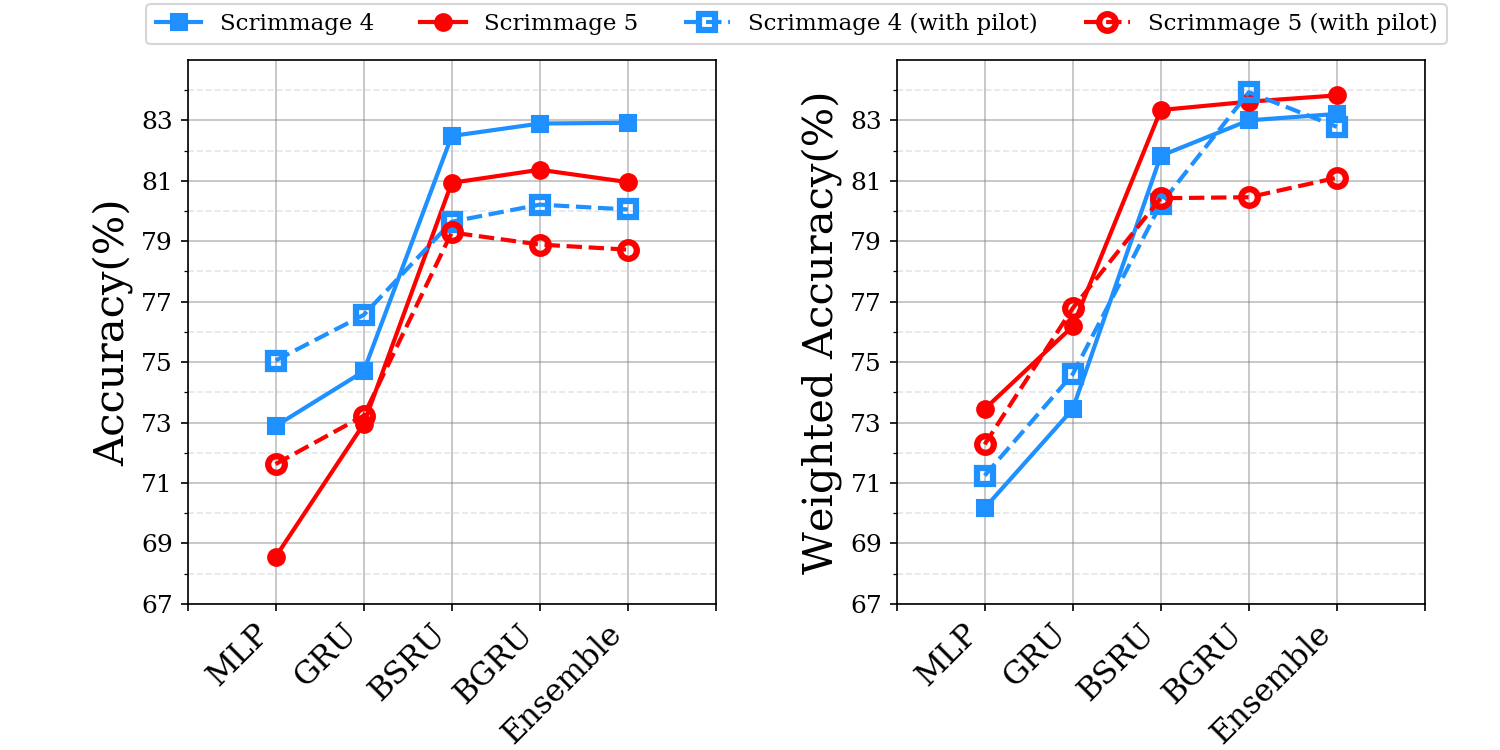

In [7]:
fig = plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.subplot(1,2,1)

ax = plt.gca()

plotres.plot(kind='line',x='Neural Network',y='Scrimmage 4', color = 'dodgerblue',
             lineStyle = '-', marker = 's', markerSize=8, lineWidth=2, ax=ax)

plotres.plot(kind='line',x='Neural Network',y='Scrimmage 5', color = 'r',
             lineStyle = '-', marker = 'o', markerSize=8, lineWidth=2, ax=ax)

plotres.plot(kind='line',x='Neural Network',y='Scrimmage 4 (with pilot)', 
             color = 'dodgerblue', lineStyle = '--', marker = 's', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

plotres.plot(kind='line',x='Neural Network',y='Scrimmage 5 (with pilot)', 
            color = 'r', lineStyle = '--', marker = 'o', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

ax.axes.set_ylim(ylmin,ylmax)
major_ticks = np.arange(ylmin, ylmax, 2)
minor_ticks = np.arange(ylmin, ylmax, 1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(axis = 'both', which='major', linestyle='solid', color = 'gray', alpha=0.5)
ax.grid(axis = 'y', which='minor', linestyle='--', color = 'gray', alpha=0.2)

plt.xticks(list(range(len(plotres))), list(plotres['Neural Network']),
       rotation=45, ha='right')

ax.axes.xaxis.label.set_visible(False)
ax.get_legend().remove()
plt.ylabel('Accuracy(%)')

box = ax.get_position()
box.y0 = box.y0 + 0.07
box.y1 = box.y1 + 0.04
ax.set_position(box)

plt.subplot(1,2,2)

ax = plt.gca()

plotwres.plot(kind='line',x='Neural Network',y='Scrimmage 4', color = 'dodgerblue',
             lineStyle = '-', marker = 's', markerSize=8, lineWidth=2, ax=ax)

plotwres.plot(kind='line',x='Neural Network',y='Scrimmage 5', color = 'r',
             lineStyle = '-', marker = 'o', markerSize=8, lineWidth=2, ax=ax)

plotwres.plot(kind='line',x='Neural Network',y='Scrimmage 4 (with pilot)', 
             color = 'dodgerblue', lineStyle = '--', marker = 's', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

plotwres.plot(kind='line',x='Neural Network',y='Scrimmage 5 (with pilot)', 
            color = 'r', lineStyle = '--', marker = 'o', markerSize=8, 
             markerfacecolor = 'none', markeredgewidth = 3, lineWidth=2, ax=ax)

ax.axes.set_ylim(ylmin,ylmax)
major_ticks = np.arange(ylmin, ylmax, 2)
minor_ticks = np.arange(ylmin, ylmax, 1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(axis = 'both', which='major', linestyle='solid', color = 'gray', alpha=0.5)
ax.grid(axis = 'y', which='minor', linestyle='--', color = 'gray', alpha=0.2)

plt.xticks(list(range(len(plotres))), list(plotres['Neural Network']),
       rotation=45, ha='right')

ax.axes.xaxis.label.set_visible(False)
ax.get_legend().remove()
plt.ylabel('Weighted Accuracy(%)')

box = ax.get_position() # Move and resize the subplot to show all axis and labels
box.x0 = box.x0 + 0.05
box.x1 = box.x1 + 0.05
box.y0 = box.y0 + 0.07
box.y1 = box.y1 + 0.04
ax.set_position(box)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.09,1.01), loc="upper left", ncol=4)


plt.savefig('Accr.png',dpi = 150)
plt.show()

# The saved figure looks okay, but the legends are misplaced in the shown figure

display(Image('Accr.png')) # Display the saved image


# SNR Plot

In [12]:
snrlims = range(0,41)
snrwind = 10


scr4_mean = 31.827541
scr4_std = 7.5468507
scr5_mean = 33.17964
scr5_std = 6.6672482

In [13]:
snrs = [];
tags = []
for i in range(len(link_dataset_4)):
    dt = link_dataset_4[i][0][:,0].numpy() * scr4_std + scr4_mean
    snrs.append(dt)
    tag = link_dataset_4[i][1].numpy()
    tags.append(tag)
snrss4 = np.concatenate(snrs)
tagss4 = np.concatenate(tags)
snrmax2 = snrss4.max()


In [14]:
snrs = [];
tags = []
for i in range(len(link_dataset_5)):
    dt = link_dataset_5[i][0][:,0].numpy() * scr5_std + scr5_mean
    snrs.append(dt)
    tag = link_dataset_5[i][1].numpy()
    tags.append(tag)
snrss5 = np.concatenate(snrs)
tagss5 = np.concatenate(tags)
snrmax2 = snrss5.max()


In [15]:
num_ratio = 4
num_snr = len(snrlims)
ratios = np.zeros((num_ratio,num_snr))

for count, snrvals in enumerate(snrlims):    
    # SCR4
    inds = np.where((snrss4 >= snrvals - snrwind/2) & (snrss4 < (snrvals + snrwind/2)))
    ratios[0,count]= sum(tagss4[inds])/len(tagss4[inds]) # Success Ratio
    ratios[1,count] =  1-ratios[0,count] # Error Ratio
    # SCR5
    inds = np.where((snrss5 >= snrvals - snrwind/2) & (snrss5 < (snrvals + snrwind/2)))
    ratios[2,count]= sum(tagss5[inds])/len(tagss5[inds]) # Success Ratio
    ratios[3,count] =  1-ratios[2,count] # Error Ratio

In [24]:
num_methods = 4
num_snr = len(snrlims)
accr2 = np.zeros((num_methods,num_snr))

for count, snrvals in enumerate(snrlims): 
    
    # bgru SCR4 2
    inds = np.where((bgru_scr4_res['bgru_scr4_snr_2'] >= snrvals - snrwind/2) 
                    & (bgru_scr4_res['bgru_scr4_snr_2'] < (snrvals + snrwind/2)))
    predict = bgru_scr4_res['bgru_scr4_prd_2'][inds]
    target = bgru_scr4_res['bgru_scr4_trg_2'][inds]
    tp = predict[target==1].sum()
    tn = (target==0).sum() - predict[target==0].sum()
    fp = predict[target==0].sum()
    fn = (target==1).sum() - predict[target==1].sum()
    accr2[0,count]= 100 * (tp+tn)/(tp+tn+fp+fn)

    # bgru SCR5 3
    inds = np.where((bgru_scr5_res['bgru_scr5_snr'] >= snrvals - snrwind/2) 
                    & (bgru_scr5_res['bgru_scr5_snr'] < (snrvals + snrwind/2)))
    predict = bgru_scr5_res['bgru_scr5_prd'][inds]
    target = bgru_scr5_res['bgru_scr5_trg'][inds]
    tp = predict[target==1].sum()
    tn = (target==0).sum() - predict[target==0].sum()
    fp = predict[target==0].sum()
    fn = (target==1).sum() - predict[target==1].sum()
    accr2[1,count]= 100 * (tp+tn)/(tp+tn+fp+fn)

    # bgru SCR4 2 Pilot
    inds = np.where((bgru_scr4_res['bgru_scr4_plt_snr_2'] >= snrvals - snrwind/2) 
                    & (bgru_scr4_res['bgru_scr4_plt_snr_2'] < (snrvals + snrwind/2)))
    predict = bgru_scr4_res['bgru_scr4_plt_prd_2'][inds]
    target = bgru_scr4_res['bgru_scr4_plt_trg_2'][inds]
    tp = predict[target==1].sum()
    tn = (target==0).sum() - predict[target==0].sum()
    fp = predict[target==0].sum()
    fn = (target==1).sum() - predict[target==1].sum()
    accr2[2,count]= 100 * (tp+tn)/(tp+tn+fp+fn)

    # bgru SCR5 3 Pilot
    inds = np.where((bgru_scr5_res['bgru_scr5_plt_snr'] >= snrvals - snrwind/2) 
                    & (bgru_scr5_res['bgru_scr5_plt_snr'] < (snrvals + snrwind/2)))
    predict = bgru_scr5_res['bgru_scr5_plt_prd'][inds]
    target = bgru_scr5_res['bgru_scr5_plt_trg'][inds]
    tp = predict[target==1].sum()
    tn = (target==0).sum() - predict[target==0].sum()
    fp = predict[target==0].sum()
    fn = (target==1).sum() - predict[target==1].sum()
    accr2[3,count]= 100 * (tp+tn)/(tp+tn+fp+fn)


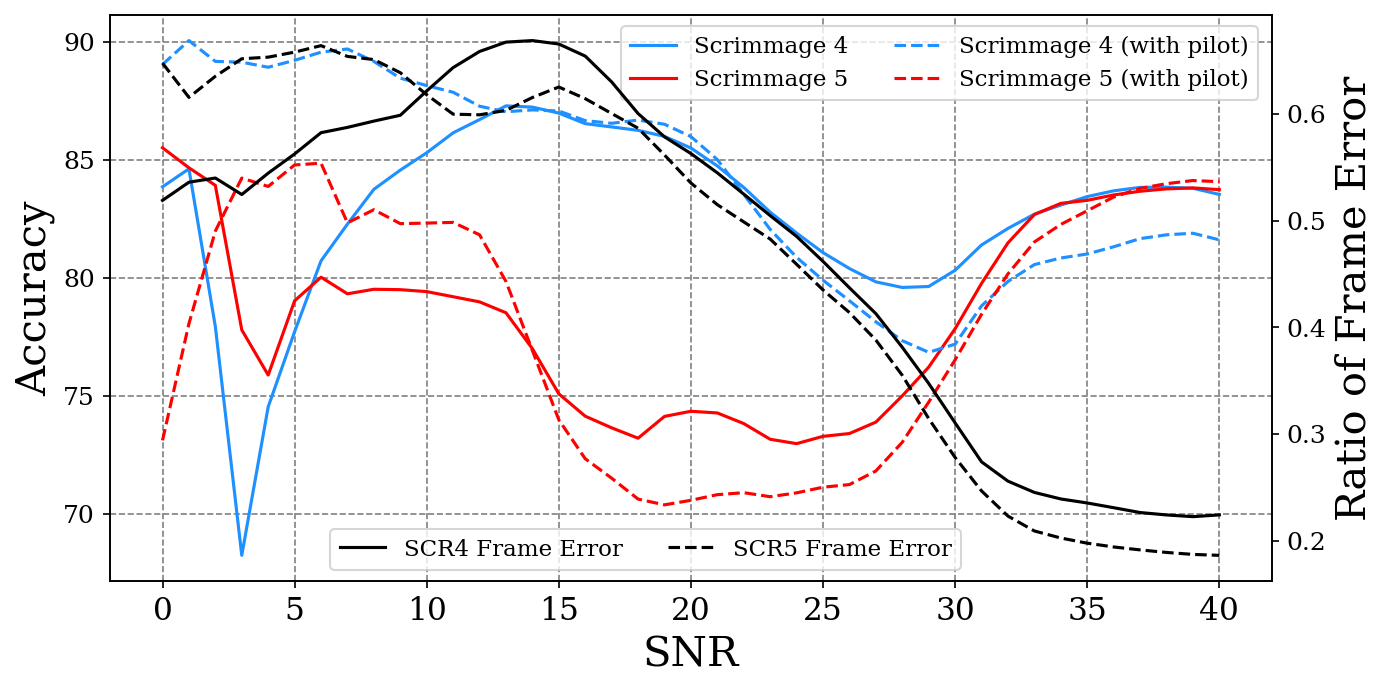

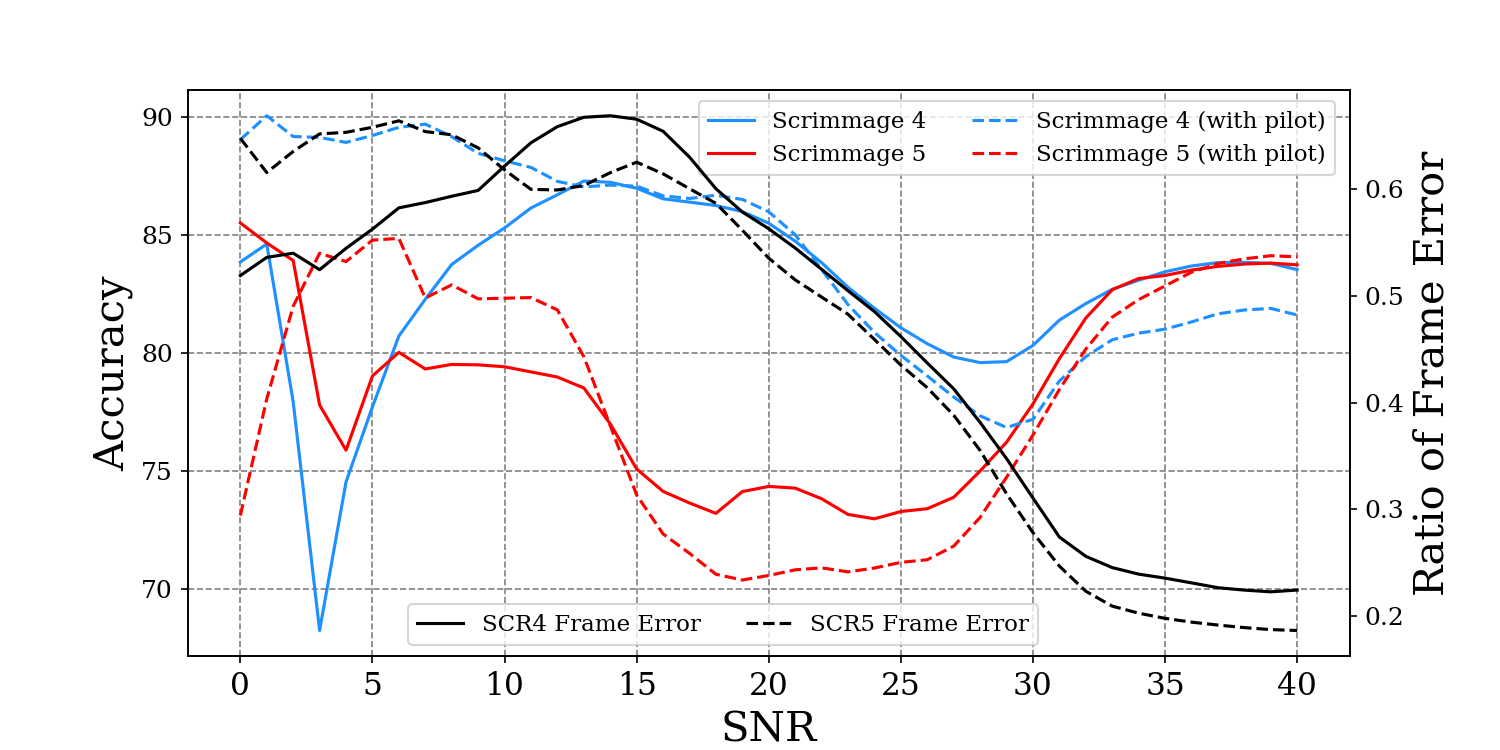

In [25]:
plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.grid(linestyle='--', color = 'gray')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(snrlims,accr2[0,:], color='dodgerblue', label = 'Scrimmage 4')
ax1.plot(snrlims,accr2[1,:], color='r', label = 'Scrimmage 5')
ax1.plot(snrlims,accr2[2,:], color='dodgerblue',linestyle='dashed', label = 'Scrimmage 4 (with pilot)')
ax1.plot(snrlims,accr2[3,:], color='r',linestyle='dashed', label = 'Scrimmage 5 (with pilot)')


ax2.plot(snrlims,ratios[1,:], color='black', label = 'SCR4 Frame Error')
ax2.plot(snrlims,ratios[3,:], linestyle='dashed', color='black', 
         label = 'SCR5 Frame Error')

ax1.set_xlabel('SNR')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Ratio of Frame Error')

#plt.title("Accuracy Vs SNR")
ax1.legend(bbox_to_anchor=(0.43,1), loc="upper left", ncol=2)
ax2.legend(bbox_to_anchor=(0.18,0), loc="lower left", ncol=2)


plt.savefig('BGRU-SNR-Plt.png',dpi = 150)
plt.show()

display(Image('BGRU-SNR-Plt.png'))

# Per Link Plot

In [27]:
with open('mlp_scr4_res_perlink.pickle', 'rb') as file:
    mlp_scr4_res_pl = pickle.load(file)

In [28]:
with open('bsru_scr4_res_perlink.pickle', 'rb') as file:
    bsru_scr4_res_pl = pickle.load(file)

In [29]:
with open('gru_scr4_res_perlink.pickle', 'rb') as file:
    gru_scr4_res_pl = pickle.load(file)

In [30]:
with open('bgru_scr4_res_perlink.pickle', 'rb') as file:
    bgru_scr4_res_pl = pickle.load(file)

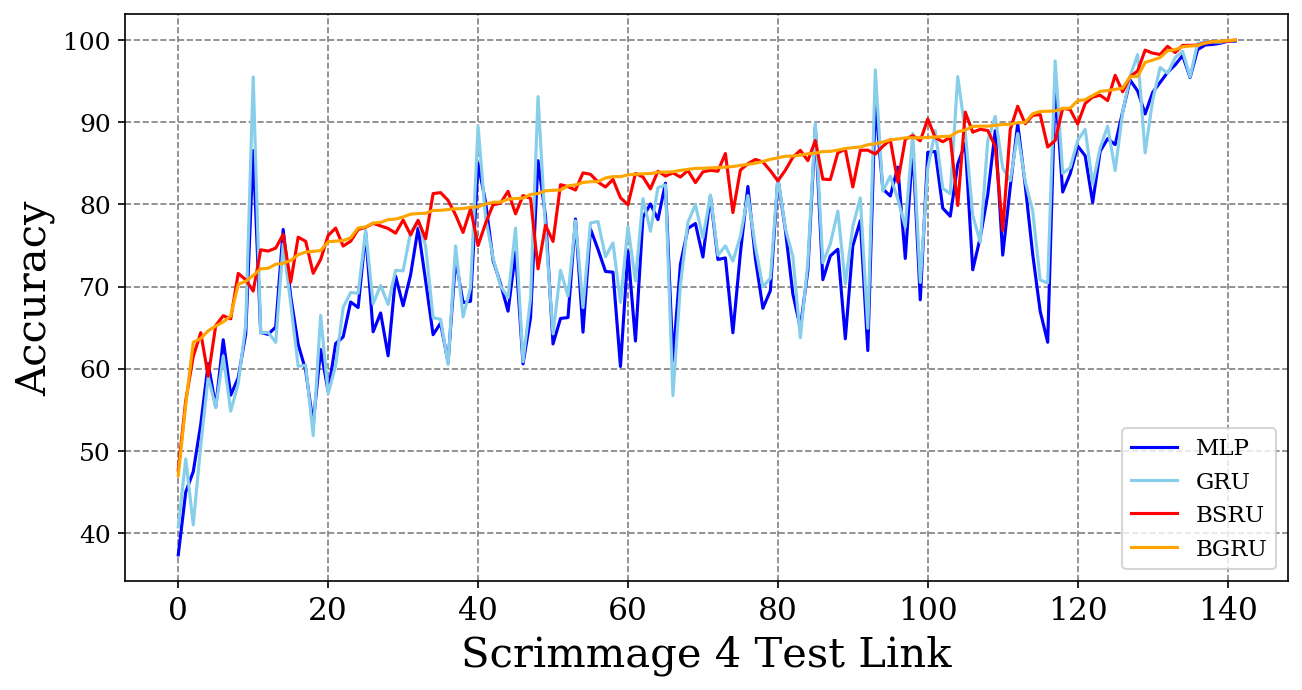

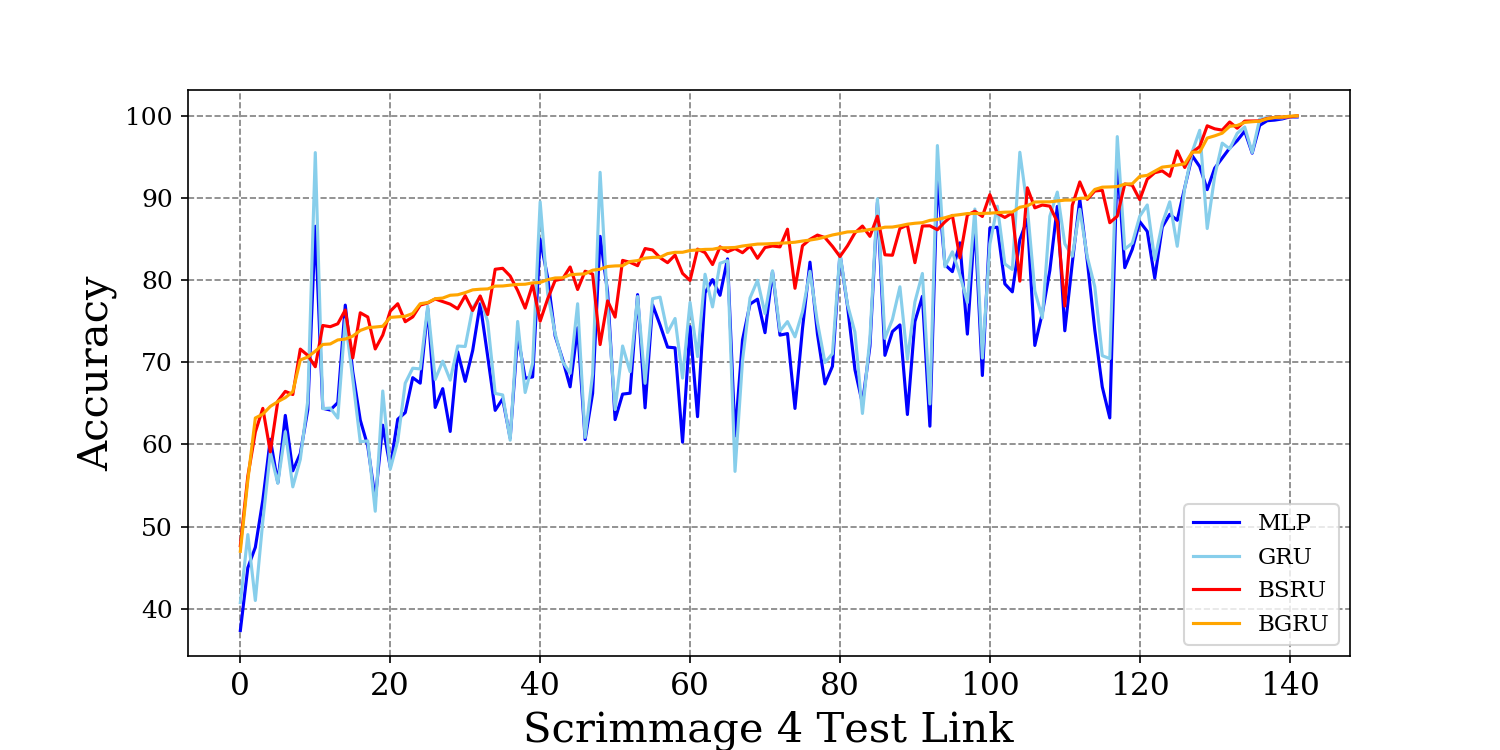

In [32]:
plt.figure(figsize=(10, 5), dpi=150)

plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.grid(linestyle='--', color = 'gray')

ax1 = plt.gca()

inds = np.argsort(bgru_scr4_res_pl['bgru_scr4_accr'])
ax1.plot(100*np.array(mlp_scr4_res_pl['mlp_scr4_accr'])[inds], 
         color='blue', label = 'MLP')
ax1.plot(100*np.array(gru_scr4_res_pl['gru_scr4_accr'])[inds],
         color='skyblue', label = 'GRU')
ax1.plot(100*np.array(bsru_scr4_res_pl['bsru2_scr4_accr'])[inds],
         color='red', label = 'BSRU')
ax1.plot(100*np.array(bgru_scr4_res_pl['bgru_scr4_accr'])[inds],
         color='orange', label = 'BGRU')

ax1.set_xlabel('Scrimmage 4 Test Link')
ax1.set_ylabel('Accuracy')

#plt.title("SCR4 Accuracy Per Link")
ax1.legend(loc="lower right")

plt.savefig('SCR4-perlink-02.png',dpi = 150)
plt.show()

display(Image('SCR4-perlink-02.png'))